<a href="https://colab.research.google.com/github/anandam06201/100-MW-pv-solar-power-plant/blob/main/DCtoAC_deviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
path='INVERTER_15MIN_REPORT_03 05 2024.csv'
df=pd.read_csv(path)
matrix=[i for i in range(25)]
m=2
for i in range(25):
    matrix[i]= df.iloc[m:m+840,0:13]
m=m+843
def date_time(matrix_form_data):
    for i in range(25):

        matrix_form_data[i]['datetime']=pd.to_datetime(matrix_form_data[i]['Unnamed: 0'],dayfirst=True)
        matrix_form_data[i]= matrix_form_data[i].set_index(['datetime'])
    return matrix_form_data

In [ ]:
def time_intervals(data):
    data_time_interval=[i for i in range(25)]

    for i in range(25):
        data_time_interval[i]=data[i].asfreq(freq='15min')





    return data_time_interval

In [ ]:
columns=['I1_acpower','I1_dcpower','I1_acenergy','I2_acpower','I2_dcpower','I2_acenergy','I3_acpower','I3_dcpower','I3_acenergy','I4_acpower','I4_dcpower','I4_acenergy']
x=date_time(matrix)
y=time_intervals(x)
y[0].columns

Index(['Unnamed: 0', '03/05/2024', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [ ]:
for i in range(25):
    y[i] = y[i].drop('Unnamed: 0', axis=1)
    y[i]=y[i].set_axis(columns,axis='columns')
    y[i]=y[i].astype(float)


y[0].info()
y[0].columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2024-05-03 05:30:00 to 2024-05-03 19:15:00
Freq: 15T
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   I1_acpower   56 non-null     float64
 1   I1_dcpower   56 non-null     float64
 2   I1_acenergy  56 non-null     float64
 3   I2_acpower   56 non-null     float64
 4   I2_dcpower   56 non-null     float64
 5   I2_acenergy  56 non-null     float64
 6   I3_acpower   56 non-null     float64
 7   I3_dcpower   56 non-null     float64
 8   I3_acenergy  56 non-null     float64
 9   I4_acpower   56 non-null     float64
 10  I4_dcpower   56 non-null     float64
 11  I4_acenergy  56 non-null     float64
dtypes: float64(12)
memory usage: 5.7 KB


Index(['I1_acpower', 'I1_dcpower', 'I1_acenergy', 'I2_acpower', 'I2_dcpower',
       'I2_acenergy', 'I3_acpower', 'I3_dcpower', 'I3_acenergy', 'I4_acpower',
       'I4_dcpower', 'I4_acenergy'],
      dtype='object')

In [ ]:
def dc_ac_conversion(data):
    for i in range(25):
        data[i]['dc_ac1']=data[i]['I1_dcpower']-data[i]['I1_acpower']
        data[i]['dc_ac2']=data[i]['I2_dcpower']-data[i]['I2_acpower']
        data[i]['dc_ac3']=data[i]['I3_dcpower']-data[i]['I3_acpower']
        data[i]['dc_ac4']=data[i]['I4_dcpower']-data[i]['I4_acpower']

    return data

def inverter_dctoac(date_time):
    for i in range(25):
        date_time[i]=date_time[i][['dc_ac1','dc_ac2','dc_ac3','dc_ac4']]

    return date_time


def lineplot_block_inverter_dctoac(i):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(10)


    plt.plot(b[i]['dc_ac1'],label='I1')
    plt.plot(b[i]['dc_ac2'],label='I2')
    plt.plot(b[i]['dc_ac3'],label='I3')
    plt.plot(b[i]['dc_ac4'],label='I4')
    plt.legend()
    plt.grid()

    plt.show()


In [ ]:
a=dc_ac_conversion(y)
b=inverter_dctoac(a)

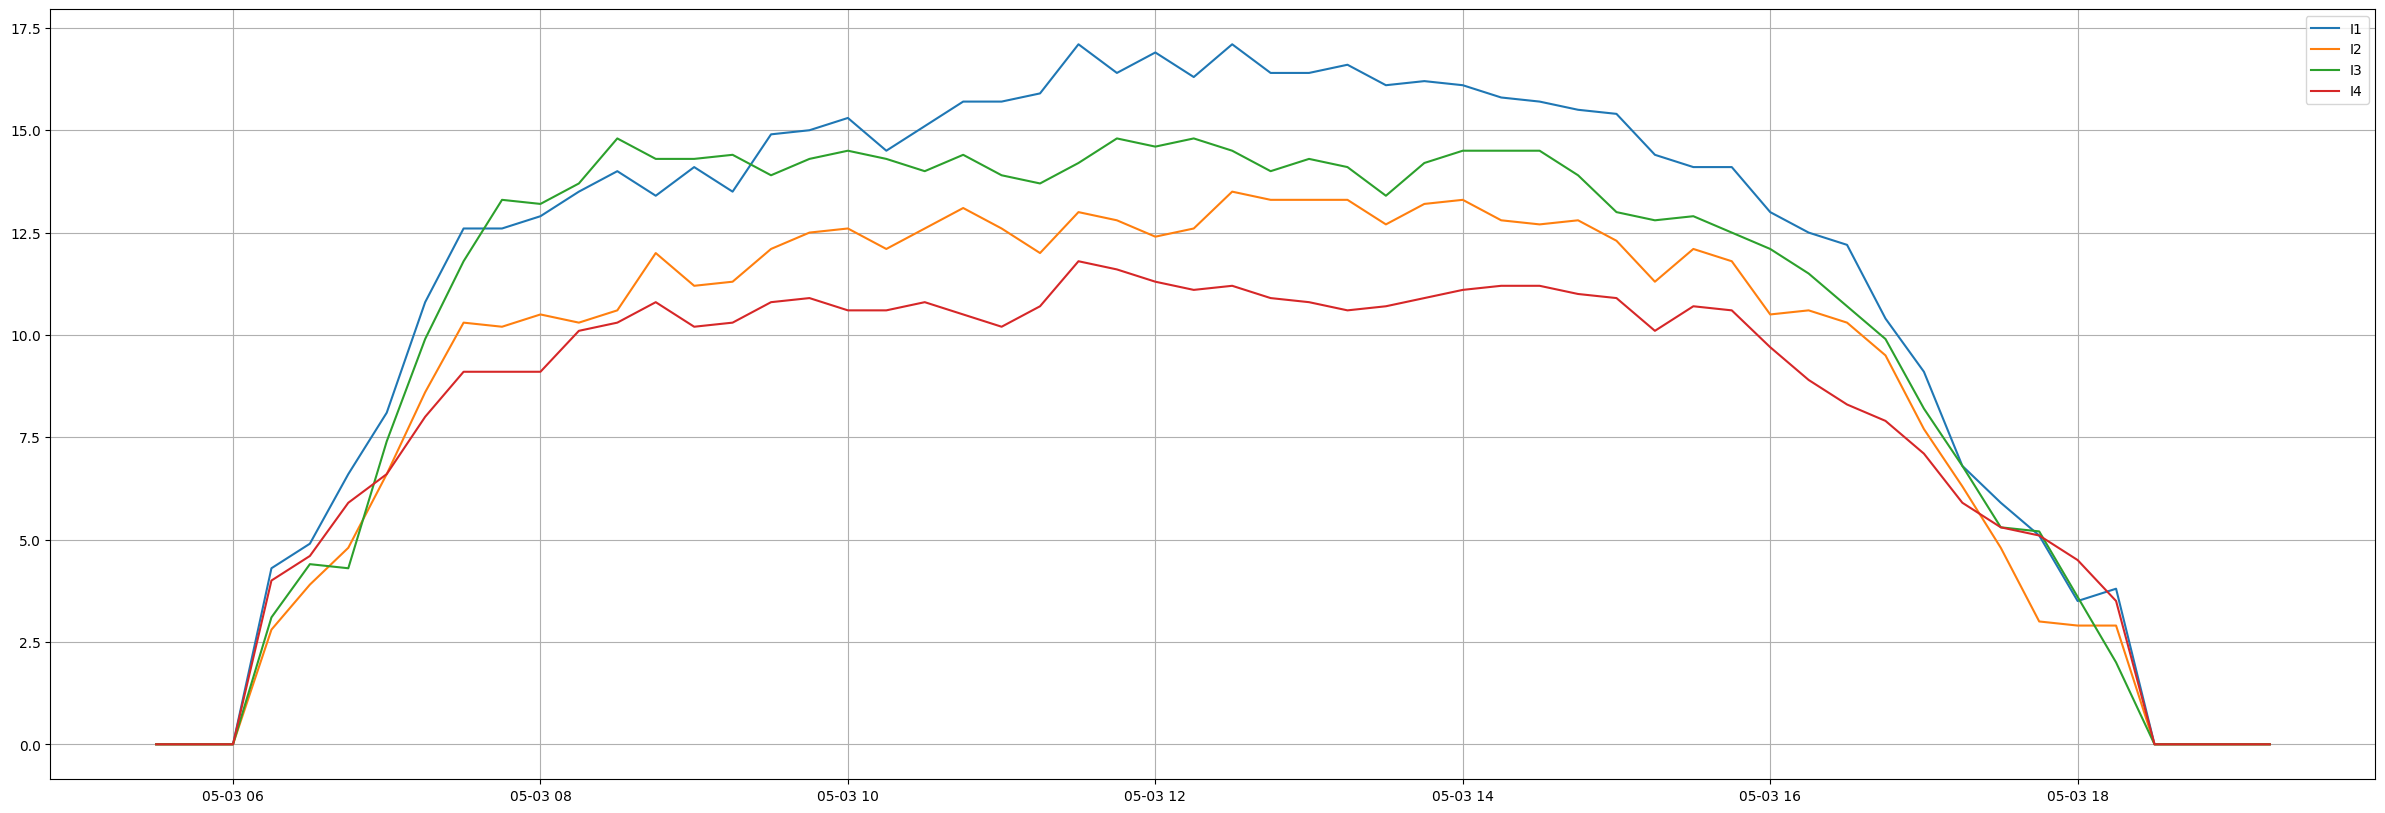

In [ ]:
lineplot_block_inverter_dctoac(15)